<a href="https://colab.research.google.com/github/omidkhalafbeigi/word2vec_cbow/blob/main/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence, Tokenizer
from matplotlib import pyplot as plt


In [2]:
sentences = ['this is the first sentence for word2vec',
             'this is the second sentence',
             'yet another sentence',
             'one more sentence',
             'and the final sentence']

window_size = 2

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
words = list()
one_hot = list()
words_to_num = tokenizer.word_index

vocab = len(words_to_num)

In [16]:
model = Sequential()
model.add(Embedding(input_dim=vocab, output_dim=2, input_shape=(2,)))
model.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(2,)))
model.add(Dense(vocab, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2, 2)              28        
                                                                 
 lambda_1 (Lambda)           (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 14)                42        
                                                                 
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


In [17]:
encoded_sentences = list()
for sentence_idx in range(len(sentences)):
  encoded_sentence = list()
  sentence = sentences[sentence_idx].split(' ')
  for word_idx in range(len(sentence)):
    num = words_to_num[sentence[word_idx]] - 1
    encoded_sentence.append(num)

  encoded_sentences.append(encoded_sentence)

In [18]:
encoded_sentences

[[2, 3, 1, 4, 0, 5, 6],
 [2, 3, 1, 7, 0],
 [8, 9, 0],
 [10, 11, 0],
 [12, 1, 13, 0]]

In [19]:
sentences

['this is the first sentence for word2vec',
 'this is the second sentence',
 'yet another sentence',
 'one more sentence',
 'and the final sentence']

In [ ]:
epochs = 2000

for epoch in range(epochs):
  for sentence in encoded_sentences:
    for target_idx in range(window_size, len(sentence)):
      X = np.array(sentence[target_idx - window_size : target_idx]).reshape((1, -1))
      y = to_categorical(y=sentence[target_idx], num_classes=vocab, dtype='int').reshape((1, -1))
      loss = model.train_on_batch(X, y)

  print(loss)

In [21]:
vectors = model.get_weights()[0]

In [31]:
for key in words_to_num.keys():
  words_to_num[key] -= 1

In [36]:
keys = list(words_to_num.keys())
values = list(words_to_num.values())

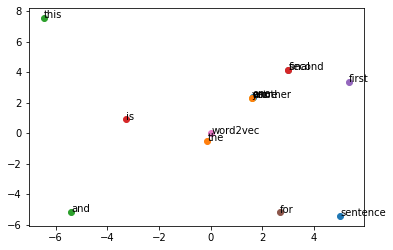

In [52]:
for idx in values:
  x, y = vectors[idx][0], vectors[idx][1]
  plt.scatter(x, y)
  plt.annotate(keys[idx], (x, y))
